### Effective Key Transition : Method 1B

- key position adjusted in increments of 0.25 mm
- Helmholtz resonance analysis used for effective opening / closing calibration
- key manipulated by mechanical device with **point finger**
- infrared sensor used for key position error estimation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import audacity

import FluteTransients as ftr

%matplotlib notebook

In [2]:
# Listing relevant datafiles
acquisitions = [0, 1, 2]
runnames = np.arange(250, 675, 25)
RUNS = 17
channel_config = (3, 2, 0, 1)

dfiles = []
for acq in acquisitions:
    dfiles.append([])
    for r, rn in enumerate(runnames):
        acqfiles = "DATA/MAIN_4500rpm/transferfunc/%d_%d.aup" % (rn, acq)
        dfiles[acq].append(acqfiles)
        
reffile = "DATA/MAIN_4500rpm/transferfunc/reference_sinebbd.aup"

In [3]:
# Instrument specs
class Instr:
    def __init__(self, tonehole, bore, foot, chimney):
        self.tonehole = tonehole
        self.bore = bore
        self.foot = foot
        self.chimney = chimney

In [4]:
# Acoustic constants
class Param:
    def __init__(self, gamma, patm, rhoatm):
        self.gamma = gamma
        self.patm = patm
        self.rhoatm = rhoatm
        self.c = np.sqrt(gamma*patm/rhoatm)

In [5]:
# # Experimental model
# class Model:
#     def __init__(self, instr_obj, param_obj):
#         self.volume = (np.pi*instr_obj.bore**2/4)*instr_obj.foot
#         self._instr = instr_obj
#         self._param = param_obj
        
#     def __call__(self, keydist):
#         if keydist <= 0.0:
#             self.efflen = 0
#             self.flowarea = 0
#             self.helmfreq = 0
#             self.inertance = self.inertance
#         else:
#             #-+-+-+-+-+
#             # change effective length estimation here 
#             # as a function of average key apperture and
#             # average chimney height
#             #-+-+
#             self.flowarea = np.pi*self._instr.tonehole*keydist*2/3
# #             self.efflen = np.sqrt(
# #                 self._instr.tonehole**2/16 + keydist**2/4) + self._instr.chimney
#             self.efflen = np.sqrt(
#                 self._instr.tonehole**2/16 + keydist**2/4)
#             self.helmfreq = self._param.c/(2*np.pi)*np.sqrt(
#                 self.flowarea/(self.volume*self.efflen))
#             self.inertance = self._param.rhoatm*self.efflen/self.flowarea

In [6]:
# Calculations for experimental data
class Result:
    def __init__(self, param_obj):
        self._param = param_obj
#         self._instr = instr_obj
    
    def __call__(self, helmfreq, model_obj):
        self._model = model_obj
#         self._holearea = np.pi*self._instr.tonehole**2/4
        if self._model.helmfreq == 0:
            self.inertance = self.inertance
            self.efflen = 0
        else:
#             flowarea = min(self._model.flowarea, self._holearea)
            inertance = self._param.gamma*self._param.patm/(
                4*np.pi**2*helmfreq**2*self._model.volume)
            self.inertance = inertance
            self.efflen = inertance*self._model.flowarea/self._param.rhoatm
            #-+-+-+-+-+
            # possibility to add "neck" volume and
            # "neck" mass calculations based on
            # geometry estimations assumed for efflen
            #-+-+

In [7]:
# # Setting instrument specs
# bflute = Instr(0.0139, 0.0186, 0.16, 0.003)

# Setting acoustical constants
params = Param(1.4, 101000, 1.2)

# # Setting initial model variables
# model = Model(bflute, params)

# Initialising data calculator
lab = Result(params)

In [8]:
# Obtaining internal and external test data
refdata = ftr.get_tfdata(reffile, *channel_config, nfft=1024*2, testing=True)
acq1_open = ftr.get_tfdata(dfiles[0][0], *channel_config, nfft=1024*2, testing=True)
acq2_open = ftr.get_tfdata(dfiles[1][0], *channel_config, nfft=1024*2, testing=True)
acq3_open = ftr.get_tfdata(dfiles[2][0], *channel_config, nfft=1024*2, testing=True)

DATA/MAIN_4500rpm/transferfunc/reference_sinebbd.aup
Delay: 1765 samples
DATA/MAIN_4500rpm/transferfunc/250_0.aup
Delay: 1764 samples
DATA/MAIN_4500rpm/transferfunc/250_1.aup
Delay: 1764 samples
DATA/MAIN_4500rpm/transferfunc/250_2.aup
Delay: 1764 samples


In [9]:
# Obtaining transfer function data
data = []
for acqno, acqfiles in enumerate(dfiles):
    data.append([])
    for file in acqfiles:
        filedata = ftr.get_tfdata(file, *channel_config, nfft=1024*2)
        data[acqno].append(filedata)

DATA/MAIN_4500rpm/transferfunc/250_0.aup
DATA/MAIN_4500rpm/transferfunc/275_0.aup
DATA/MAIN_4500rpm/transferfunc/300_0.aup
DATA/MAIN_4500rpm/transferfunc/325_0.aup
DATA/MAIN_4500rpm/transferfunc/350_0.aup
DATA/MAIN_4500rpm/transferfunc/375_0.aup
DATA/MAIN_4500rpm/transferfunc/400_0.aup
DATA/MAIN_4500rpm/transferfunc/425_0.aup
DATA/MAIN_4500rpm/transferfunc/450_0.aup
DATA/MAIN_4500rpm/transferfunc/475_0.aup
DATA/MAIN_4500rpm/transferfunc/500_0.aup
DATA/MAIN_4500rpm/transferfunc/525_0.aup
DATA/MAIN_4500rpm/transferfunc/550_0.aup
DATA/MAIN_4500rpm/transferfunc/575_0.aup
DATA/MAIN_4500rpm/transferfunc/600_0.aup
DATA/MAIN_4500rpm/transferfunc/625_0.aup
DATA/MAIN_4500rpm/transferfunc/650_0.aup
DATA/MAIN_4500rpm/transferfunc/250_1.aup
DATA/MAIN_4500rpm/transferfunc/275_1.aup
DATA/MAIN_4500rpm/transferfunc/300_1.aup
DATA/MAIN_4500rpm/transferfunc/325_1.aup
DATA/MAIN_4500rpm/transferfunc/350_1.aup
DATA/MAIN_4500rpm/transferfunc/375_1.aup
DATA/MAIN_4500rpm/transferfunc/400_1.aup
DATA/MAIN_4500rp

<IPython.core.display.Javascript object>


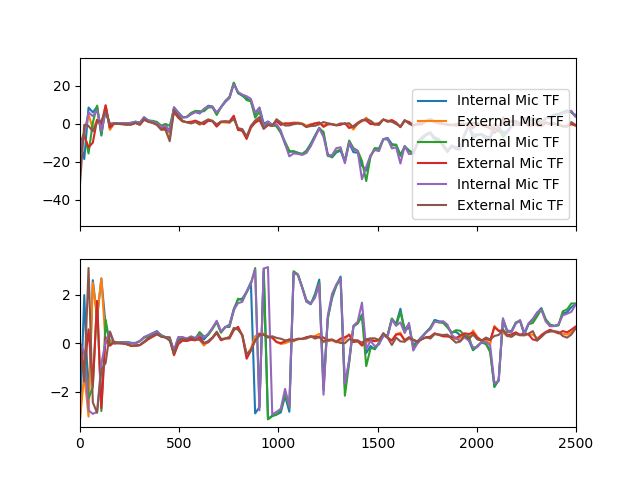

In [10]:
# Testing internal and external data
fig,ax = plt.subplots(2,sharex=True)
fig.set_label("Initial position (open) recordings, internal vs external spectra")

for acq in [acq1_open, acq2_open, acq3_open]:
    tf_int = 20*np.log10(np.abs(acq['tf_src_int']/refdata['tf_src_int']))
    angle_int = np.angle(acq['tf_src_int']/refdata['tf_src_int'])
    ax[0].plot(refdata['f_int'], tf_int, label="Internal Mic TF")
    ax[1].plot(refdata['f_int'], angle_int)

    tf_ext = 20*np.log10(np.abs(acq['tf_src_ext']/refdata['tf_src_ext']))
    angle_ext = np.angle(acq['tf_src_ext']/refdata['tf_src_ext'])
    ax[0].plot(refdata['f_ext'], tf_ext, label="External Mic TF")
    ax[1].plot(refdata['f_ext'], angle_ext)

    ax[0].legend(loc='lower right')
    ax[0].set_xlim((0, 2500))

<IPython.core.display.Javascript object>


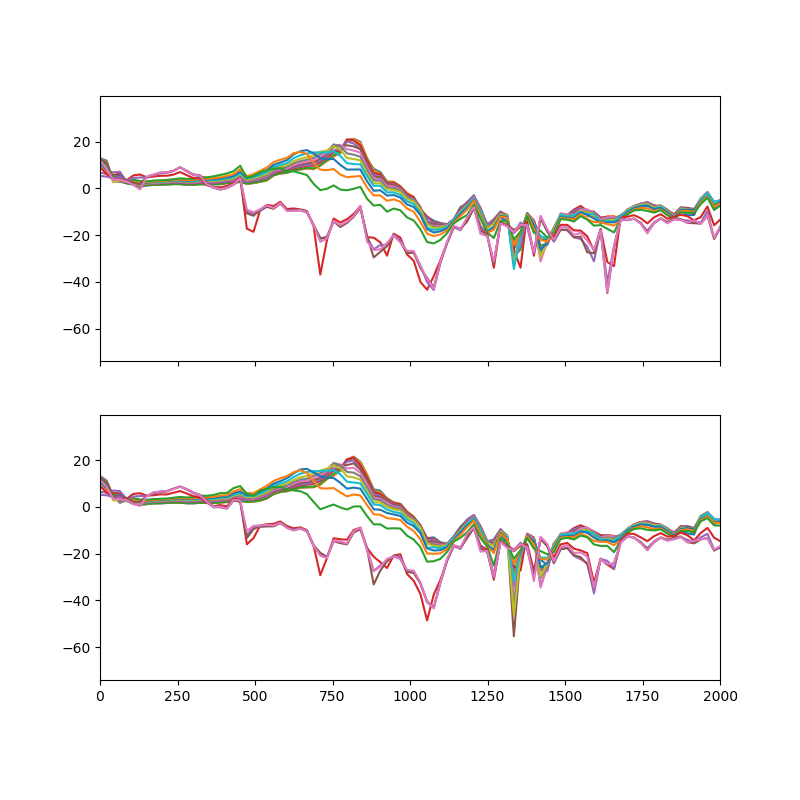

<IPython.core.display.Javascript object>


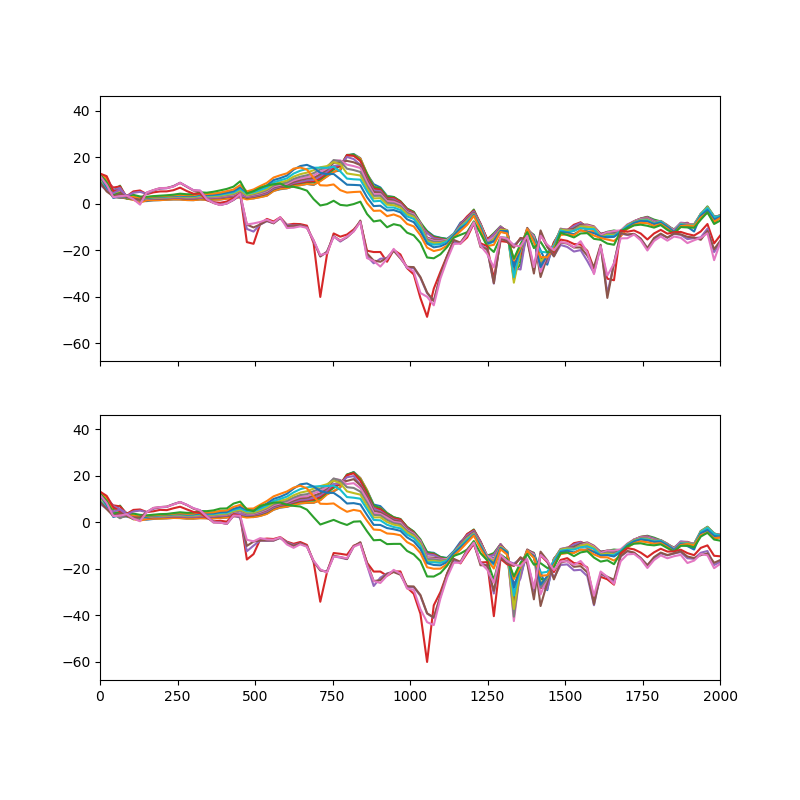

<IPython.core.display.Javascript object>


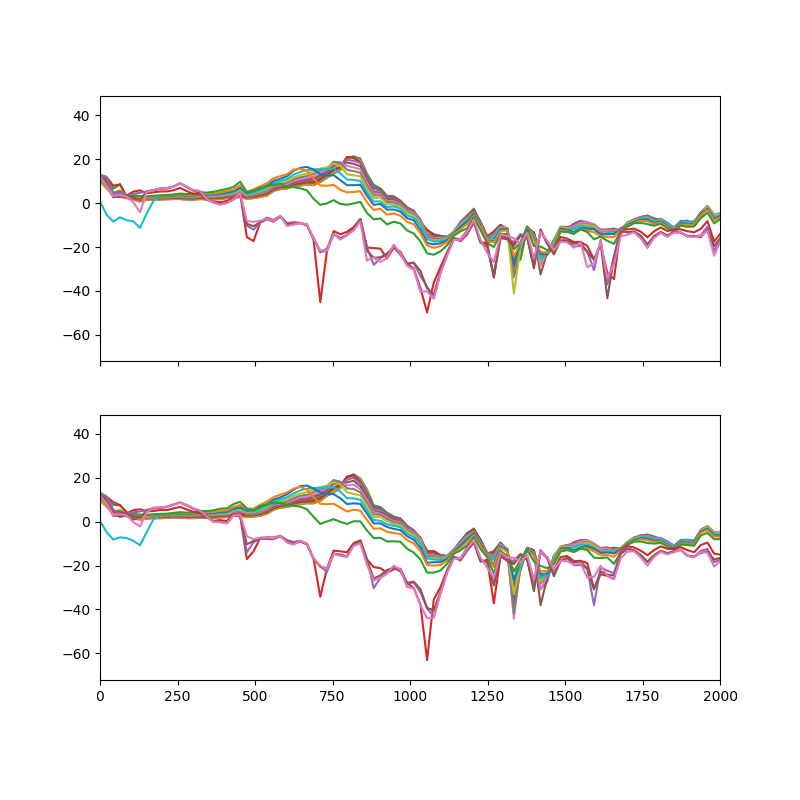

In [11]:
# Plotting TF (unfiltered + filtered)
from matplotlib.transforms import Bbox
from matplotlib.patches import Rectangle

def full_extent(ax, pad=0.5):
    """Get the full extent of an axes, including axes labels, tick labels, and
    titles."""
    # For text objects, we need to draw the figure first, otherwise the extents
    # are undefined.
    ax.figure.canvas.draw()
    items = ax.get_xticklabels() + ax.get_yticklabels()
    items += [ax, ax.title, ax.xaxis.label, ax.yaxis.label]
    items += [ax, ax.title]
    bbox = Bbox.union([item.get_window_extent() for item in items])
    return bbox.expanded(1.0 + pad, 1.0 + pad)

for acqno, acqdata in enumerate(data):
    fig,ax = plt.subplots(2,sharex=True, sharey=True, figsize=((8,8)))
    for r, rdata in enumerate(acqdata):
        tfraw = 20*np.log10(np.abs(rdata['tf']))
        tflevel = ftr.filter_tfdata(rdata['tf'], 2, 0.75)
        fvals = rdata['f']
        ax[0].set_xlim((0, 2000))
        ax[0].plot(fvals, tfraw)
        ax[1].plot(fvals, tflevel)
    extent = Bbox.union([full_extent(x) for x in ax[:]])
    extent = extent.transformed(fig.transFigure.inverted())
    rect = Rectangle([extent.xmin, extent.ymin], extent.width, extent.height,
                     facecolor='white', edgecolor='none', zorder=-1, 
                     transform=fig.transFigure)
    fig.patches.append(rect)
    plt.subplots_adjust(bottom=0.15)

In [11]:
# Obtaining resonance frequency data
Hfx = []
Hfy = []
for acqno, acqdata in enumerate(data):
    Hfx.append([])
    Hfy.append([])
    for r, rdata in enumerate(acqdata):
        fvals = rdata['f']
        tflevel = ftr.filter_tfdata(rdata['tf'], 2, 0.75)
        hfx, hfy = ftr.get_hf(tflevel, fvals, 100, 1000)
        Hfx[acqno].append(hfx)
        Hfy[acqno].append(hfy)

In [12]:
# Determining opening and closing values from resonance
keytrans = []
for acqno, acqdata in enumerate(data):
    ktrans = ()
    Hf = Hfx[acqno]
    openHf = max(Hf)
    closedHf = min(Hf)
    for r in range(RUNS):
        if Hf[r]==openHf and Hf[r+1]!=openHf:
            ktrans = ktrans+(r,)
        elif Hf[r]==closedHf:
            ktrans = ktrans+(r,)
            break
    keytrans.append(ktrans)

keytrans

[(5, 13), (5, 13), (5, 13)]

In [13]:
# Organising data and calculating model

# Theoretical = {'efflen' : [], 'hfreq' : [], 'inert' : []}
Experimental = {'efflen' : [], 'hfreq' : Hfx, 'inert' : []}
for acqno, acqdata in enumerate(data):
    kopen = keytrans[acqno][0]
    kclsd = keytrans[acqno][1]
    keyincr = [(k-kclsd)*(-0.25) for k in np.arange(RUNS)]
    
#     efflenT = []
#     hfreqT = []
#     inertT = []
    efflenE = []
    inertE = []
    for i, incr in enumerate(keyincr):
#         model(incr*0.001)
#         lab(Hfx[acqno][i], model)
#         efflenT.append(model.efflen)
#         hfreqT.append(model.helmfreq)
#         inertT.append(model.inertance)
        efflenE.append(lab.efflen)
        inertE.append(lab.inertance)
               
#     Theoretical['efflen'].append(efflenT)
#     Theoretical['hfreq'].append(hfreqT)
#     Theoretical['inert'].append(inertT)
    Experimental['efflen'].append(efflenE)
    Experimental['inert'].append(inertE)

In [14]:
# meanHf = np.mean(Theoretical['hfreq'], axis=0)
# stdevsHf = ftr.get_stdevs(Theoretical['hfreq'], meanHf)
meanFpk = np.mean(Experimental['hfreq'], axis=0)
stdevsFpk = ftr.get_stdevs(Experimental['hfreq'], meanFpk)

# meanInTh = np.mean(Theoretical['inert'], axis=0)
# stdevsInTh = ftr.get_stdevs(Theoretical['inert'], meanInTh)
meanInEx = np.mean(Experimental['inert'], axis=0)
stdevsInEx = ftr.get_stdevs(Experimental['inert'], meanInEx)

# meanElTh = np.mean(Theoretical['efflen'], axis=0)
# stdevsElTh = ftr.get_stdevs(Theoretical['efflen'], meanElTh)
meanElEx = np.mean(Experimental['efflen'], axis=0)
stdevsElEx = ftr.get_stdevs(Experimental['efflen'], meanElEx)

<IPython.core.display.Javascript object>


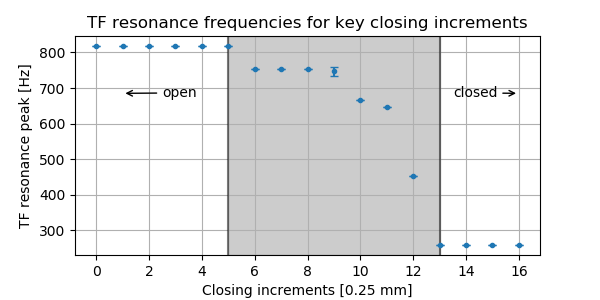

Text(0,0.5,'TF resonance peak [Hz]')

In [15]:
# Plotting resonance vs key displacement
fig = plt.figure(figsize=((6, 3)))
fmts = ['o', '.', 'x']

# plt.plot(np.arange(RUNS), meanHf, 'x--',
#          alpha=0.75, label='helmholtz model')

plt.errorbar(np.arange(RUNS), meanFpk,
         yerr=stdevsFpk, fmt='.', capsize=3, label='point finger data')
    
# plt.axvspan(keytrans[0][1], keytrans[1][1], color='k', alpha=0.25)
# plt.axvspan(keytrans[0][0], keytrans[1][0], color='k', alpha=0.25)

plt.axvspan(keytrans[0][0], keytrans[1][1], color='k',alpha=0.2)
plt.axvline(np.mean([keytrans[0][1], keytrans[1][1]]), color='k', alpha=0.5)
plt.annotate('closed', (np.mean([keytrans[0][1], keytrans[1][1]])+3, 685), 
             (np.mean([keytrans[0][1], keytrans[1][1]])+0.5, 675), 
             arrowprops=dict(arrowstyle='->'))
plt.axvline(np.mean([keytrans[0][0], keytrans[1][0]]), color='k', alpha=0.5)
plt.annotate('open', (np.mean([keytrans[0][0], keytrans[1][0]])-4, 685), 
             (np.mean([keytrans[0][0], keytrans[1][0]])-2.5, 675), 
             arrowprops=dict(arrowstyle='->'))
plt.subplots_adjust(bottom=0.15)
plt.grid()
plt.title('TF resonance frequencies for key closing increments')
plt.xlabel('Closing increments [0.25 mm]')
plt.ylabel('TF resonance peak [Hz]')
# plt.legend(loc='lower center', bbox_to_anchor=(0.55,0))

# plt.savefig('TF-ptresonance.png')

<IPython.core.display.Javascript object>


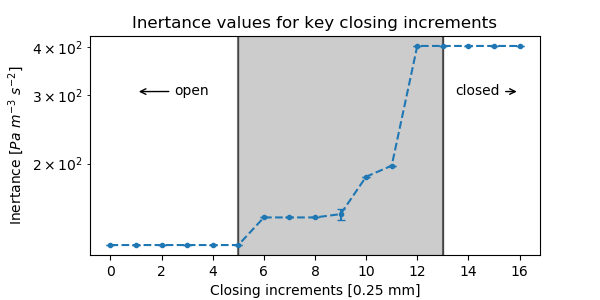

In [16]:
# Plotting inertance vs key displacement
fig = plt.figure(figsize=((6, 3)))
fmts = ['o--', '.--', 'x--']

plt.errorbar(np.arange(RUNS), meanInEx, yerr=stdevsInEx,
             capsize=3, fmt='.--')
plt.yscale('log')

# for acqno, acqdata in enumerate(data):
#     plt.semilogy(np.arange(RUNS), Experimental['inert'][acqno], 
#              str(fmts[acqno]), label='acquisition %d' %(acqno+1))
#     plt.semilogy(np.arange(RUNS), Theoretical['inert'][acqno], 
#              str(fmts[acqno]), alpha=0.5, label='model %d' %(acqno+1))
    
plt.axvspan(keytrans[0][1], keytrans[1][1], color='k', alpha=0.25)
plt.axvspan(keytrans[0][0], keytrans[1][0], color='k', alpha=0.25)

plt.axvspan(keytrans[0][0], keytrans[1][1], color='k',alpha=0.2)
plt.axvline(np.mean([keytrans[0][1], keytrans[1][1]]), color='k', alpha=0.5)
plt.annotate('closed', (np.mean([keytrans[0][1], keytrans[1][1]])+3, 307), 
             (np.mean([keytrans[0][1], keytrans[1][1]])+0.5, 300), 
             arrowprops=dict(arrowstyle='->'))
plt.axvline(np.mean([keytrans[0][0], keytrans[1][0]]), color='k', alpha=0.5)
plt.annotate('open', (np.mean([keytrans[0][0], keytrans[1][0]])-4, 307), 
             (np.mean([keytrans[0][0], keytrans[1][0]])-2.5, 300), 
             arrowprops=dict(arrowstyle='->'))
plt.subplots_adjust(bottom=0.15)
plt.title('Inertance values for key closing increments')
plt.xlabel('Closing increments [0.25 mm]')
plt.ylabel('Inertance [$Pa$ $m^{-3}$ $s^{-2}$]')
plt.legend(loc='upper left')
plt.gcf().subplots_adjust(left=0.15)


# plt.savefig('TF-ptinertance.png')

<IPython.core.display.Javascript object>


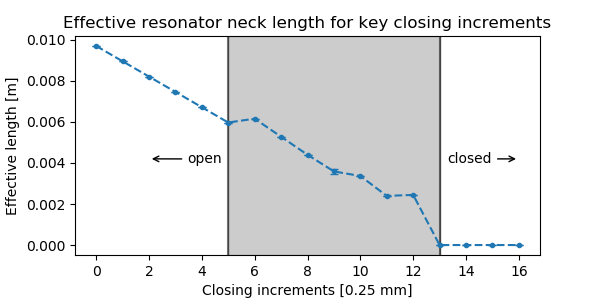

In [16]:
# Plotting effective length vs key displacement
fig = plt.figure(figsize=((6, 3)))
fmts = ['o--', '.--', 'x--']

plt.errorbar(np.arange(RUNS), meanElEx, yerr=stdevsElEx,
             capsize=3, fmt='.--')

# for acqno, acqdata in enumerate(data):
#     plt.plot(np.arange(RUNS), Experimental['efflen'][acqno], 
#              str(fmts[acqno]), label='acquisition %d' %(acqno+1))
#     plt.plot(np.arange(RUNS), Theoretical['efflen'][acqno], 
#              str(fmts[acqno]), alpha=0.5, label='model %d' %(acqno+1))
    
plt.axvspan(keytrans[0][1], keytrans[1][1], color='k', alpha=0.25)
plt.axvspan(keytrans[0][0], keytrans[1][0], color='k', alpha=0.25)

plt.axvspan(keytrans[0][0], keytrans[1][1], color='k',alpha=0.2)
plt.axvline(np.mean([keytrans[0][1], keytrans[1][1]]), color='k', alpha=0.5)
plt.annotate('closed', (np.mean([keytrans[0][1], keytrans[1][1]])+3, 0.0042), 
             (np.mean([keytrans[0][1], keytrans[1][1]])+0.3, 0.004), 
             arrowprops=dict(arrowstyle='->'))
plt.axvline(np.mean([keytrans[0][0], keytrans[1][0]]), color='k', alpha=0.5)
plt.annotate('open', (np.mean([keytrans[0][0], keytrans[1][0]])-3, 0.0042), 
             (np.mean([keytrans[0][0], keytrans[1][0]])-1.55, 0.004), 
             arrowprops=dict(arrowstyle='->'))
plt.subplots_adjust(bottom=0.15)
plt.title('Effective resonator neck length for key closing increments')
plt.xlabel('Closing increments [0.25 mm]')
plt.ylabel('Effective length [m]')
plt.legend(loc='lower left')

# plt.savefig('TF-ptefflen.png')

In [17]:
pointHF = Experimental['hfreq']
%store pointHF
pointLL = Experimental['inert']
%store pointLL
pointEL = Experimental['efflen']
%store pointEL
# pointTrans = keytrans
# %store pointTrans

Stored 'pointHF' (list)
Stored 'pointLL' (list)
Stored 'pointEL' (list)


In [67]:
import tabulate

OPEN = keytrans[0][0]
CLOSED = keytrans[1][1]

efflen_mm = [i*1000 for i in meanElEx]
efflenerr_mm = [i*1000 for i in stdevsElEx]

incr_col = np.arange(0, (CLOSED-OPEN+1)*0.25, 0.25).tolist()
rfreq_col = meanFpk[OPEN:CLOSED+1].tolist()
rfreq_err = stdevsFpk[OPEN:CLOSED+1].tolist()
inert_col = meanInEx[OPEN:CLOSED+1].tolist()
inert_err = stdevsInEx[OPEN:CLOSED+1].tolist()
efflen_col = efflen_mm[OPEN:CLOSED+1]
efflen_err = efflenerr_mm[OPEN:CLOSED+1]

table_data = np.array([incr_col,rfreq_col,rfreq_err,
                        inert_col,inert_err,efflen_col,efflen_err])
table_data = table_data.T.tolist()

headers = ["Aperture [mm]", "Resonance [Hz]", "Res. error [Hz]", "Inertance [\si{Pa.m^{-3}.s^{-2}}]",
          "Inert. error [\si{Pa.m^{-3}.s^{-2}}]", "Effective length [mm]", "Eff. l. error [mm]"]

# print(tabulate.tabulate(table_data, tablefmt='latex_raw', floatfmt='.2f'))

tf_point_table = tabulate.tabulate(table_data, headers, tablefmt='latex_raw', floatfmt='.2f')
# np.savetxt('TFpoint-table.txt', ['%s' %tf_point_table], fmt='%s')

In [49]:
tabulate.tabulate?